<a href="https://colab.research.google.com/github/gustavoravel/data_science_portfolio/blob/main/Analyzing_Airbnb_Data_(London).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Airbnb Data - London

[Airbnb](https://www.airbnb.com.br/) is considered to be the **largest hotel company today**. Detail is, it **doesn't have any hotel room**!

Connecting people who want to travel (and stay) and hosts who want to rent their properties in a easy way, Airbnb provides an innovative platform to make this practical.

At the end of 2018, the Startup founded 10 years ago, had **hosted over 300 million** people around the world, challenging traditional hotel networks.

One of Airbnb's initiatives is to provide website data for some of the world's major cities. Through the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal, it is possible to download a large amount of data to develop *Data Science* projects and solutions.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we'll analyze London accommodation data, and see what insights can be extracted from raw data.**

<img src='https://cdn.wallpapersafari.com/55/57/c35CRg.jpeg'>

## Obtaining the Data

As mentioned before, all the data was got from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal.

For this exploratory data analysis, we're gonna load *`listings.csv` - *Summary information and metrics for listings in London (good for visualisations).*

In [ ]:
# let's first import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# load the listings.csv file to a DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2020-12-16/visualisations/listings.csv')

## Analyzing the Data

In this step, we're gonna understand the dataset to analyze its situation and what kind of information it provides.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77136 entries, 0 to 77135
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              77136 non-null  int64  
 1   name                            77112 non-null  object 
 2   host_id                         77136 non-null  int64  
 3   host_name                       77095 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   77136 non-null  object 
 6   latitude                        77136 non-null  float64
 7   longitude                       77136 non-null  float64
 8   room_type                       77136 non-null  object 
 9   price                           77136 non-null  int64  
 10  minimum_nights                  77136 non-null  int64  
 11  number_of_reviews               77136 non-null  int64  
 12  last_review                     

**Feature Mapping**

* `id` - realty identifier
* `name` - property's name
* `host_id` - host identifier
* `host_name` - host name
* `neighbourhood_group` - neighbourhood defined group (there's no data in this column)
* `neighbourhood` - neighbourhood name
* `latitude` - property's latitude coordinate
* `longitude` - property's longitude coordinate
* `room_type` - room's type listed
* `price` - room's price
* `minimum_nights` - minimum number of nights to book
* `number_of_reviews` - number of reviews the property has
* `last_review` - last review date
* `reviews_per_month` - number of reviews per month 
* `calculated_host_listings_count` - number of properties from the same host
* `availability_365` - number of availability days within 365 days

Before the analyze starts, let's verify our dataset, through the first 5 entries.

In [ ]:
# let's show the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,105,2,192,2020-03-26,1.46,2,338
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.17,2,365
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.66,1,189
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.35,15,231
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


### **How many features and entries has our dataset? What are their data types?**

Knowing that we're working with a summarized version of our dataset, let's see the number of entries and features does it has, to have an ideia what we're dealing with.


In [ ]:
# identifying DataFrame volume
print("Entries:\t {}".format(df.shape[0]))
print("Features:\t {}\n".format(df.shape[1]))

# identifying the dataset data types
print(df.dtypes)

Entries:	 77136
Features:	 16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### **How many missing values?**

A dataset's quality is quite related to how many missing values it has. The sooner we get this information, soon we know how can it impact our analysis, if they're meaningful compared o the filled entries.

In [ ]:
# features by its missing values in decreasing order
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.290798
last_review                       0.290798
host_name                         0.000532
name                              0.000311
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* We can see the column `neighbourhood_group` has 100% of its messing values. 
* The columns `reviews_per_month` and `last_review` has almost a half of missing values.
* The columns `name` and `host_name` has approximately 0,1% of missing values.

### **What are the frequency distribution of features?** 

Let's use a histogram to see the frequency distribution of our numeric features.

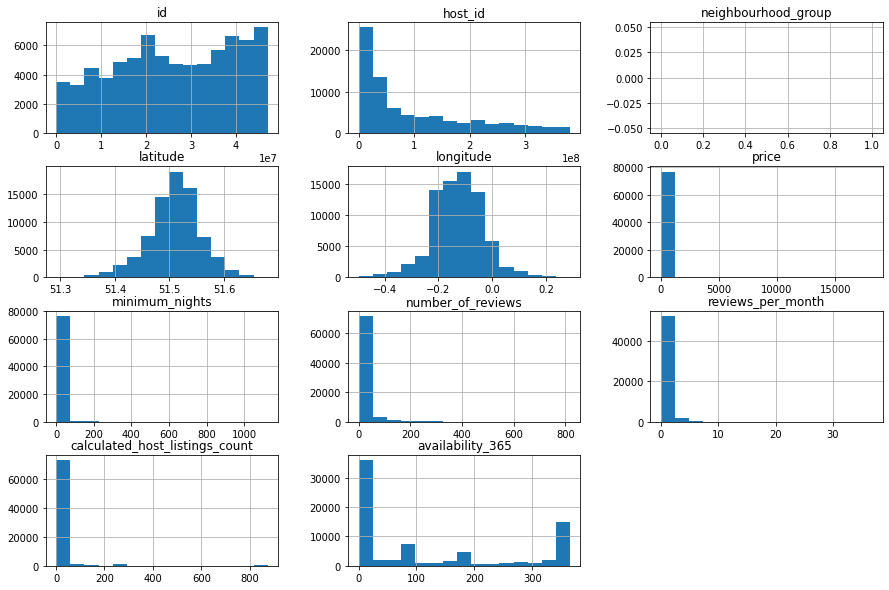

In [ ]:
# plot a histogram of the numeric columns
df.hist(bins=15, figsize=(15,10));

### **What is the average rental price?**

We already know that the cost of living in London is not the lowest, and this includes the rental price, even vacation rentals. The next snippet will bring it to us. 

In [ ]:
# `price` column mean

avg_rental_prc = df['price'].mean()
avg_rental_prc

120.56977286869945

### **What is the correlation between the features?**

One of the biggest data scientist ability is to measure the relationship between different variables, correlation coefficients help us to measure this relationship. 

The most used method to measure correlations is *Pearson Correlation Coefficient*, that expresses the degree of correlation through values between -1 and 1. Most close to 1, there is a positive linear relationship, Most close to -1, there's a negative or inverse correlation.

Let's see it in the next snippets:



In [ ]:
# create the correlation matrix
num_feat = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
corr = df[num_feat].corr()

# mostrar a matriz de correlação
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.022320,-0.024999,-0.020937,0.051715,0.064659
minimum_nights,0.022320,1.000000,-0.020068,-0.032374,-0.019586,0.043024
number_of_reviews,-0.024999,-0.020068,1.000000,0.771553,-0.060122,0.089502
reviews_per_month,-0.020937,-0.032374,0.771553,1.000000,-0.049440,0.130720
calculated_host_listings_count,0.051715,-0.019586,-0.060122,-0.049440,1.000000,-0.025023
availability_365,0.064659,0.043024,0.089502,0.130720,-0.025023,1.000000


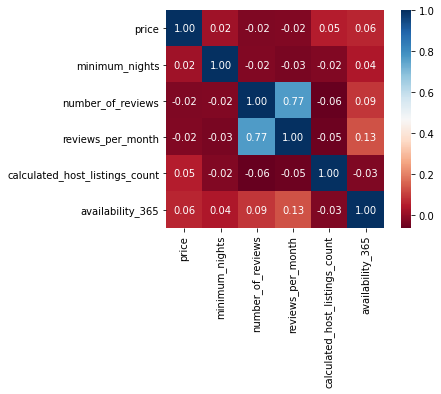

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **What is the most rented room type?**

The `room_type` column indicates the type of rental advertised on Airbnb. If you have already rented on the website, you know there are options for apartments/entire houses, just renting a room or even sharing a room with other people.

Let's see it in the next snippets, using `value_counts()`.

In [ ]:
# show the number of available room type
df['room_type'].value_counts()

Entire home/apt    42395
Private room       33558
Shared room          603
Hotel room           580
Name: room_type, dtype: int64

In [ ]:
# show the percentage of each available room type
df['room_type'].value_counts() / df.shape[0]

Entire home/apt    0.549614
Private room       0.435050
Shared room        0.007817
Hotel room         0.007519
Name: room_type, dtype: float64

### **What is the most expensive location?**

We can see that the cost depends on the area you will live in. The closest to the center (zone 1-2), higher the cost.

Let's see it using `groupby()` and a scatterplot.



In [ ]:
# show average neighbourhood price
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
City of London            296.590234
Westminster               222.348170
Kensington and Chelsea    193.843119
Islington                 130.671114
Camden                    127.090857
Richmond upon Thames      124.196573
Hammersmith and Fulham    121.591984
Wandsworth                113.129156
Merton                    108.602419
Southwark                 106.349369
Name: price, dtype: float64

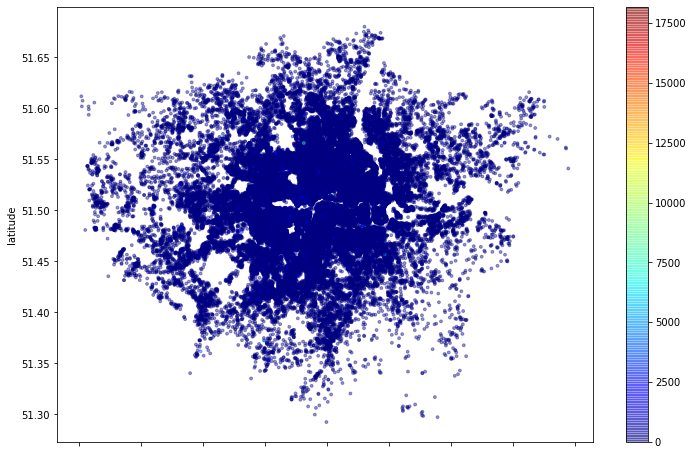

In [ ]:
# plot rooms by latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **What is the average minimum rental night?**

Sometimes the price is no big deal, if you have to stay longer than you plan, due to room `minimum_nights`. Here, we'll analyze the average `minimum_nights` of the dataset. 

In [ ]:
# show the average of `minimum_nights` column
avg_min_nights = df['minimum_nights'].mean()
avg_min_nights

5.180564198299108

## Conclusions


Independently of the room prices in Airbnb, London is a city that brings many programs and tours free or at a very affordable price. It's worth of living!

We have made a superficial data analysis using the available data base until December 2020, during the pandemics, a lot of things are subject to variation.

Finally, remember that this dataset is a short version, ideal only for an initial approach. It is recommended that the complete data set with 106 available attributes be used in a further exploratory analysis.